In [38]:
!pip install tensorflow-hub

You should consider upgrading via the 'c:\users\darryl see\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


From Google:

TensorFlow Hub is a repository of trained machine learning models. ... TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. Reuse trained models like BERT and Faster R-CNN with just a few lines of code.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow_hub

Model API reference on Tensorflow: https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV2

# Building the Model

In [79]:
# Build MoblieNetV2 model
IMAGE_SHAPE = (224, 224) + (3,)

classifier_model ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" #@param {type:"string"}

base_model = models.Sequential()
base_model.add(tensorflow_hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE))

In [80]:
base_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


# Load Dataset

(-0.5, 223.5, 223.5, -0.5)

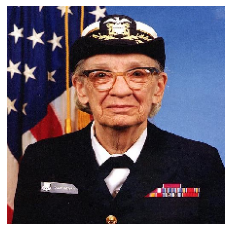

In [81]:
# View Grace Hopper
file = tf.keras.utils.get_file(
    "grace_hopper.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
img = load_img(file, target_size=[224, 224])
plt.imshow(img)
plt.axis('off')

In [82]:
grace_hopper = img_to_array(img)
grace_hopper /= 255.0
grace_hopper = grace_hopper[tf.newaxis, ...]
grace_hopper.shape

(1, 224, 224, 3)

# Fitting Model

In [83]:
result = base_model.predict(grace_hopper)
result.shape

(1, 1001)

In [84]:
result

array([[ 0.17521697,  1.2832404 , -0.31201422, ...,  0.5896091 ,
        -0.35604897,  0.12567578]], dtype=float32)

The result is a 1000 component vector of logits, rating the probability of each class for the image.

In [85]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

In [86]:
# Decode predictions
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines()) #  Read labels

In [87]:
len(imagenet_labels)

1001

In [90]:
label = imagenet_labels[predicted_class]
label

'military uniform'

# Visualise Predictions

Text(0.5, 1.0, 'military uniform')

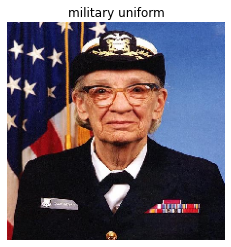

In [89]:
# Visualise Image
plt.imshow(img)
plt.axis('off')
plt.title(label)

In Computer Vision, we are often plagued by data scarity, albeit the fact that we can do data augmentation or generate artificial images. Transfer Learning allows us to use weights from a pretrained model for other specific purposes by changing the output layer of the model. Most of these models are trained on ultra large datasets (like the imagenet from Image Net Competition). Some of the more commonly used models for Transfer Learning includes ResNet50, Xception, MobileNetV2 etc etc... 